In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
warnings.simplefilter('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('/Users/tarakram/Documents/Sales Conversion optimization/data/KAG_conversion_data.csv')
data.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

**Data description** - 

ad_id: a unique ID for each ad.<br>
xyz_campaign_id: an ID associated with each ad campaign of XYZ company.<br>
fb_campaign_id: an ID associated with how Facebook tracks each campaign.<br>
age: age of the person to whom the ad is shown.<br>
gender: gender of the person to whom the ad is shown.<br>
interest: a code specifying the category to which the person's interest belongs (interests are as mentioned in the person's Facebook public profile).<br>
Impressions: the number of times the ad was shown.<br>
Clicks: number of clicks on for that ad.<br>
Spent: Amount paid by XYZ company to Facebook, to show that ad.<br>
Total_conversion: Total number of people who inquired about the product after seeing the ad.<br>
Approved_conversion: Total number of people who bought the product after seeing the ad.<br>

### Task-1:

Data Exploration and Preprocessing

Explore the dataset to understand the relationships between the features and the target variable (Approved_conversion).

Identify and handle any missing values, outliers, or data inconsistencies.<br>
Perform any necessary feature engineering or transformation.

In [3]:
data.shape # shape

(1143, 11)

In [4]:
# Our data has 1143 rows and 11 columns, we can say that it is small dataset.

In [5]:
data.info() # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
# Checking for Null values 
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
# Checking for duplicates values
data.duplicated().sum()

0

In [8]:
# Numerical Features & Categorical Features
num_features = numerical = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion','interest']
cat_features = ['age', 'gender']

In [9]:
# Printing summary stats for each column
for i in num_features:
  print(f"Column: {i}")
  print(f"Mean: {data[i].mean()}")
  print(f"Median: {data[i].median()}")
  print(f"Mode: {data[i].mode()[0]}")
  print(f"StDev: {data[i].std()}\n")
  print('-------------------------')

Column: Impressions
Mean: 186732.1329833771
Median: 51509.0
Mode: 152
StDev: 312762.1832081966

-------------------------
Column: Clicks
Mean: 33.39020122484689
Median: 8.0
Mode: 0
StDev: 56.89243830355751

-------------------------
Column: Spent
Mean: 51.36065613141295
Median: 12.36999989
Mode: 0.0
StDev: 86.90841793584877

-------------------------
Column: Total_Conversion
Mean: 2.8556430446194225
Median: 1.0
Mode: 1
StDev: 4.483593472024835

-------------------------
Column: Approved_Conversion
Mean: 0.9440069991251093
Median: 1.0
Mode: 0
StDev: 1.737708005904991

-------------------------
Column: interest
Mean: 32.76640419947507
Median: 25.0
Mode: 16
StDev: 26.952130977053642

-------------------------


In [10]:
for i in cat_features:
    print(f"Name: {i}")
    print(data[i].value_counts())
    print('-----------------')

Name: age
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
-----------------
Name: gender
M    592
F    551
Name: gender, dtype: int64
-----------------


In [11]:
# Coverting categorical variables into numerical
lb = LabelEncoder()
data['gender'] = lb.fit_transform(data['gender'])

In [12]:
df = pd.get_dummies(data, columns=['age'])

In [13]:
df['gender'].value_counts()

1    592
0    551
Name: gender, dtype: int64

In [14]:
# 1-male(592) nad 0-female(551)

In [15]:
df.head() # final Dataframe

ad_id  xyz_campaign_id  fb_campaign_id  gender  interest  Impressions  \
0  708746              916          103916       1        15         7350   
1  708749              916          103917       1        16        17861   
2  708771              916          103920       1        20          693   
3  708815              916          103928       1        28         4259   
4  708818              916          103928       1        28         4133   

   Clicks  Spent  Total_Conversion  Approved_Conversion  age_30-34  age_35-39  \
0       1   1.43                 2                    1          1          0   
1       2   1.82                 2                    0          1          0   
2       0   0.00                 1                    0          1          0   
3       1   1.25                 1                    0          1          0   
4       1   1.29                 1                    1          1          0   

   age_40-44  age_45-49  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [16]:
df.corr() #correlation

ad_id  xyz_campaign_id  fb_campaign_id    gender  \
ad_id                1.000000         0.929892        0.972002  0.058324   
xyz_campaign_id      0.929892         1.000000        0.872392  0.086118   
fb_campaign_id       0.972002         0.872392        1.000000  0.038037   
gender               0.058324         0.086118        0.038037  1.000000   
interest             0.456483         0.272282        0.595753 -0.047230   
Impressions          0.462308         0.495273        0.439439 -0.067059   
Clicks               0.431981         0.469729        0.406978 -0.168725   
Spent                0.433053         0.476689        0.403532 -0.125022   
Total_Conversion     0.346539         0.346684        0.344170 -0.027559   
Approved_Conversion  0.271331         0.284968        0.257658  0.025350   
age_30-34           -0.115297        -0.117677       -0.124770  0.030271   
age_35-39            0.045434         0.048032        0.041082  0.044824   
age_40-44            0.063397         0.065182        0.075093 -0.026071   
age_45-49            0.029789         0.028329        0.034196 -0.054980   

                     interest  Impressions    Clicks     Spent  \
ad_id                0.456483     0.462308  0.431981  0.433053   
xyz_campaign_id      0.272282     0.495273  0.469729  0.476689   
fb_campaign_id       0.595753     0.439439  0.406978  0.403532   
gender              -0.047230    -0.067059 -0.168725 -0.125022   
interest             1.000000     0.101973  0.088706  0.070226   
Impressions          0.101973     1.000000  0.948514  0.970386   
Clicks               0.088706     0.948514  1.000000  0.992906   
Spent                0.070226     0.970386  0.992906  1.000000   
Total_Conversion     0.120270     0.812838  0.694632  0.725379   
Approved_Conversion  0.058353     0.684249  0.559526  0.593178   
age_30-34           -0.055644    -0.066877 -0.150856 -0.138037   
age_35-39            0.021583    -0.028549 -0.044296 -0.039705   
age_40-44            0.029271     0.002822  0.028765  0.020909   
age_45-49            0.015942     0.102743  0.191246  0.179187   

                     Total_Conversion  Approved_Conversion  age_30-34  \
ad_id                        0.346539             0.271331  -0.115297   
xyz_campaign_id              0.346684             0.284968  -0.117677   
fb_campaign_id               0.344170             0.257658  -0.124770   
gender                      -0.027559             0.025350   0.030271   
interest                     0.120270             0.058353  -0.055644   
Impressions                  0.812838             0.684249  -0.066877   
Clicks                       0.694632             0.559526  -0.150856   
Spent                        0.725379             0.593178  -0.138037   
Total_Conversion             1.000000             0.864034   0.086600   
Approved_Conversion          0.864034             1.000000   0.095685   
age_30-34                    0.086600             0.095685   1.000000   
age_35-39                   -0.038931            -0.033133  -0.405751   
age_40-44                   -0.038657            -0.036732  -0.365691   
age_45-49                   -0.025933            -0.043914  -0.417224   

                     age_35-39  age_40-44  age_45-49  
ad_id                 0.045434   0.063397   0.029789  
xyz_campaign_id       0.048032   0.065182   0.028329  
fb_campaign_id        0.041082   0.075093   0.034196  
gender                0.044824  -0.026071  -0.054980  
interest              0.021583   0.029271   0.015942  
Impressions          -0.028549   0.002822   0.102743  
Clicks               -0.044296   0.028765   0.191246  
Spent                -0.039705   0.020909   0.179187  
Total_Conversion     -0.038931  -0.038657  -0.025933  
Approved_Conversion  -0.033133  -0.036732  -0.043914  
age_30-34            -0.405751  -0.365691  -0.417224  
age_35-39             1.000000  -0.249737  -0.284930  
age_40-44            -0.249737   1.000000  -0.256799  
age_45-49            -0.28

<Axes: >

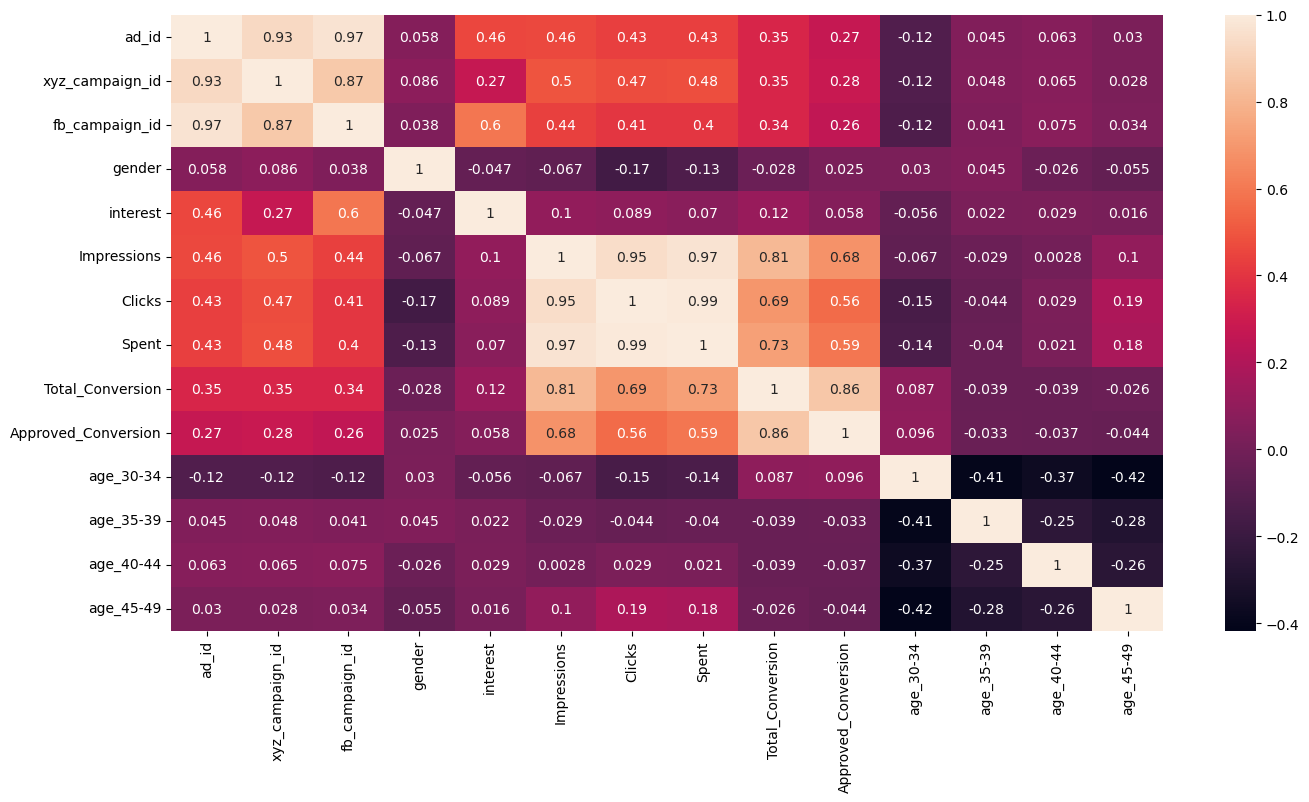

In [17]:
#Heatmap
plt.figure(figsize= (16,8))
sns.heatmap(df.corr(), annot = True)

**We Have the multicoliinearity Problem.**
+ Clicks are highly correlated with the impressions.
+ clicks are highly correalted with the Spent.
+ Impressions are Highly correalated with the Spent.
+ Impressions are Highly correalated with the clicks.
+ Add_id is Highly correlated with the fb_campaign_id, and xyz_campaign_id.<br>

**All the features are Having a Good correlation with the target variable expect the interest.**
+ Here are the some of the features that are highly correlated.

  + total_conversion
  + Impressions
  + spent
  + Clicks

In [18]:
data[['ad_id','xyz_campaign_id','fb_campaign_id']]

ad_id  xyz_campaign_id  fb_campaign_id
0      708746              916          103916
1      708749              916          103917
2      708771              916          103920
3      708815              916          103928
4      708818              916          103928
...       ...              ...             ...
1138  1314410             1178          179977
1139  1314411             1178          179978
1140  1314412             1178          179979
1141  1314414             1178          179981
1142  1314415             1178          179982

[1143 rows x 3 columns]

ad_id: a unique ID for each ad.<br>
xyz_campaign_id: an ID associated with each ad campaign of XYZ company.<br>
fb_campaign_id: an ID associated with how Facebook tracks each campaign.

In [19]:
df['ad_id'].nunique()

1143

In [20]:
df['xyz_campaign_id'].nunique()

3

In [21]:
df['fb_campaign_id'].nunique()

691

In [22]:
df['ad_id'].value_counts().sum()

1143

In [23]:
df['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [24]:
df['fb_campaign_id'].value_counts()

144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: fb_campaign_id, Length: 691, dtype: int64

In [25]:
# we can stay with one id, and remove these two

In [26]:
df.drop(['fb_campaign_id','xyz_campaign_id'], axis = 1, inplace = True)

In [27]:
df.head()

ad_id  gender  interest  Impressions  Clicks  Spent  Total_Conversion  \
0  708746       1        15         7350       1   1.43                 2   
1  708749       1        16        17861       2   1.82                 2   
2  708771       1        20          693       0   0.00                 1   
3  708815       1        28         4259       1   1.25                 1   
4  708818       1        28         4133       1   1.29                 1   

   Approved_Conversion  age_30-34  age_35-39  age_40-44  age_45-49  
0                    1          1          0          0          0  
1                    0          1          0          0          0  
2                    0          1          0          0          0  
3                    0          1          0          0          0  
4                    1          1          0          0          0

### EDA

In [28]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

the above is the Here is the Quick EDA of the data.


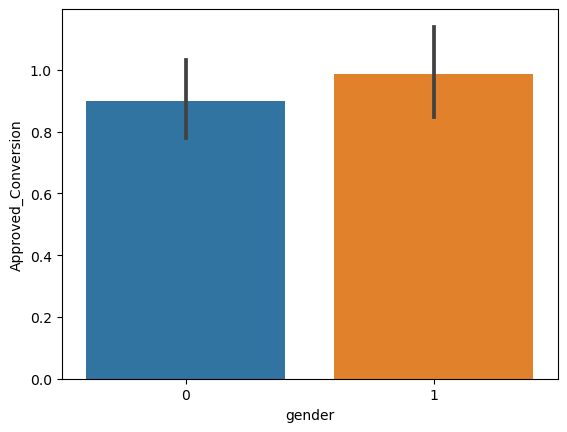

In [29]:
sns.barplot(data = df, x = 'gender', y = 'Approved_Conversion')
plt.show()

In [30]:
# We can see that Male having High Approved_conversion rate when compared to the females.

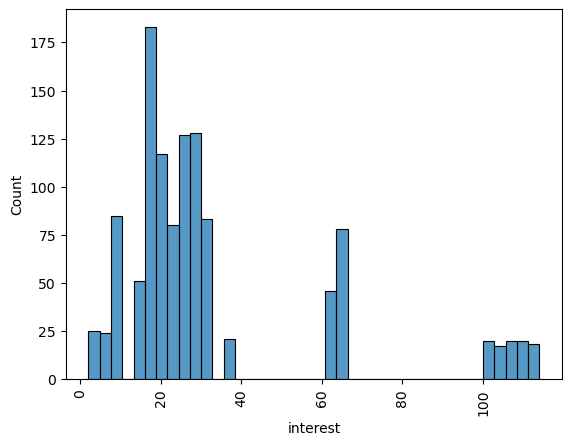

In [31]:
sns.histplot(data = df, x = 'interest')
plt.xticks(rotation = 90)
plt.show()

In [32]:
# Most of the interest are below 35
#Here we can see some of the outliers.

In [33]:
df['Impressions'].value_counts().iloc[:10]

2479     2
3812     2
152      2
1539     2
1772     2
2879     2
1030     2
11199    2
2755     2
1273     2
Name: Impressions, dtype: int64

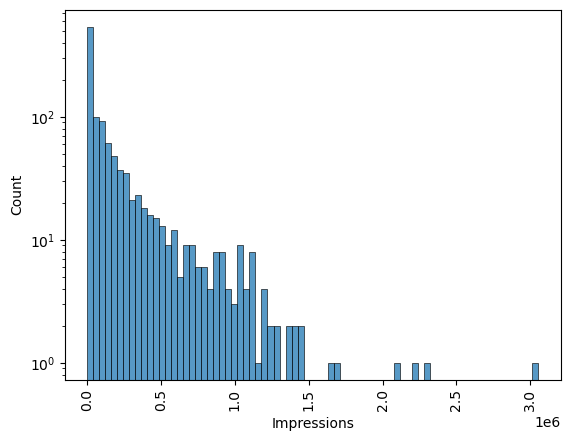

In [34]:
sns.histplot(data = df, x = 'Impressions')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [35]:
# Most of the impresssions are between 0 - 1.5
# WE have some of the outliers in the data.

In [36]:
df['Clicks'].value_counts().iloc[:15]

0     207
1     119
2      70
3      51
4      34
5      34
7      29
6      18
9      17
20     16
10     16
11     16
12     14
24     14
8      14
Name: Clicks, dtype: int64

In [37]:
# There are 207 data points that has 0 clicks.
# these are the top 15 clicks, most of them has 1 - 5 clicks.

<Axes: ylabel='Clicks'>

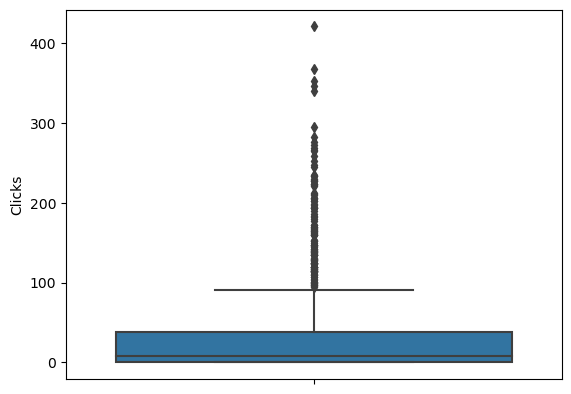

In [38]:
sns.boxplot(data = df,y = 'Clicks')

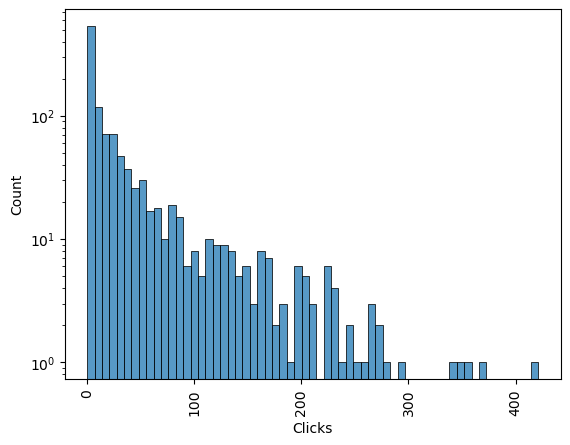

In [39]:
sns.histplot(data = df, x = 'Clicks')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [40]:
# Here we can see some of the outliers, where we have 400+ clicks.

In [41]:
df['Spent'].value_counts().iloc[:10]

0.00    207
1.38      5
1.29      4
1.54      4
1.37      3
1.58      3
1.23      3
1.50      3
1.32      3
1.57      3
Name: Spent, dtype: int64

In [42]:
# we can see that 207 data points, didn't spend zero amount.

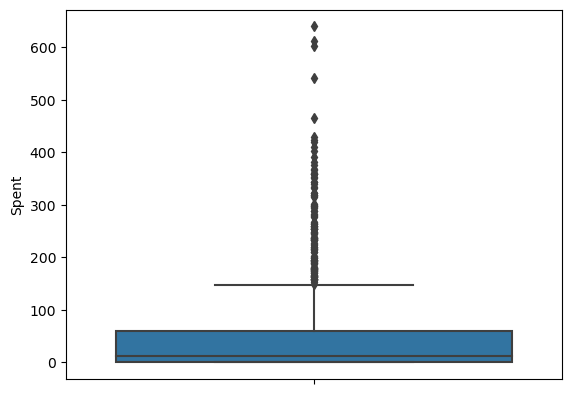

In [43]:
sns.boxplot(data = df, y = 'Spent')
plt.show()

In [44]:
# We can see the outliers here in the Spent

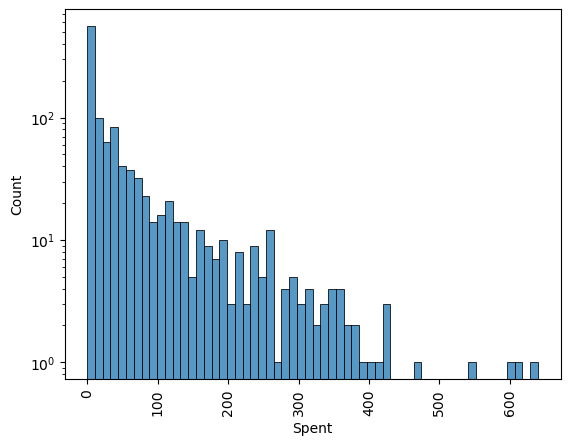

In [45]:
sns.histplot(data = df, x = 'Spent')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [46]:
# WE can see the amount spend is more than $500. those are outliers.

<Axes: xlabel='age', ylabel='count'>

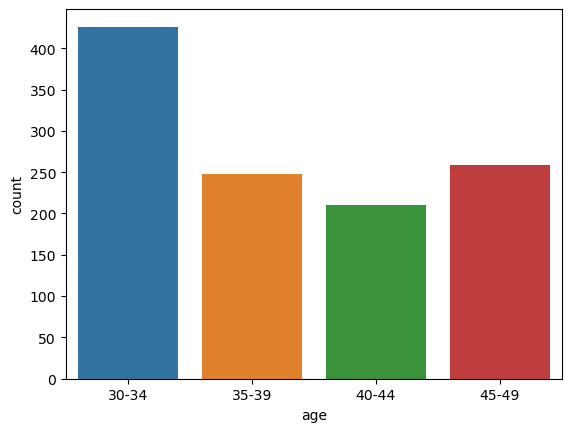

In [47]:
sns.countplot(data = data, x = 'age')

In [48]:
# most of the users are in age between 30-34, following 45-49.


### Feature Engineering

Creating New features with existing features

In [49]:
# Creating Click-Through Rate (CTR) feature
df['CTR'] = df['Clicks'] / df['Impressions'] * 100

In [50]:
# Creating Cost per Click (CPC) feature
df['CPC'] = df['Spent'] / df['Clicks']

In [51]:
# Creating Cost per Conversion feature
df['Cost_per_Conversion'] = df['Spent'] / df['Approved_Conversion']

In [52]:
# Creating Conversion Rate feature
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Total_Conversion'] * 100

In [53]:
df.head()

ad_id  gender  interest  Impressions  Clicks  Spent  Total_Conversion  \
0  708746       1        15         7350       1   1.43                 2   
1  708749       1        16        17861       2   1.82                 2   
2  708771       1        20          693       0   0.00                 1   
3  708815       1        28         4259       1   1.25                 1   
4  708818       1        28         4133       1   1.29                 1   

   Approved_Conversion  age_30-34  age_35-39  age_40-44  age_45-49       CTR  \
0                    1          1          0          0          0  0.013605   
1                    0          1          0          0          0  0.011198   
2                    0          1          0          0          0  0.000000   
3                    0          1          0          0          0  0.023480   
4                    1          1          0          0          0  0.024195   

    CPC  Cost_per_Conversion  Conversion_Rate  
0  1.43                 1.43             50.0  
1  0.91                  inf              0.0  
2   NaN                  NaN              0.0  
3  1.25                  inf              0.0  
4  1.29                 1.29            100.0

### Data cleaning

In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
print()
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

ad_id                    0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
age_30-34                0
age_35-39                0
age_40-44                0
age_45-49                0
CTR                      0
CPC                    207
Cost_per_Conversion    136
Conversion_Rate          8
dtype: int64



In [55]:
# Using KNN imputation to replace missing values
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

In [56]:
df.isnull().sum()

ad_id                  0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
age_30-34              0
age_35-39              0
age_40-44              0
age_45-49              0
CTR                    0
CPC                    0
Cost_per_Conversion    0
Conversion_Rate        0
dtype: int64

In [57]:
def remove_outliers_iqr(df):
    # Calculate the first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers from the dataframe
    new_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return pd.DataFrame(new_df)

In [58]:
new_df = remove_outliers_iqr(df)

In [59]:
new_df.head()

ad_id  gender  interest  Impressions  Clicks  Spent  Total_Conversion  \
0  708746.0     1.0      15.0       7350.0     1.0   1.43               2.0   
1  708749.0     1.0      16.0      17861.0     2.0   1.82               2.0   
2  708771.0     1.0      20.0        693.0     0.0   0.00               1.0   
3  708815.0     1.0      28.0       4259.0     1.0   1.25               1.0   
4  708818.0     1.0      28.0       4133.0     1.0   1.29               1.0   

   Approved_Conversion  age_30-34  age_35-39  age_40-44  age_45-49       CTR  \
0                  1.0        1.0        0.0        0.0        0.0  0.013605   
1                  0.0        1.0        0.0        0.0        0.0  0.011198   
2                  0.0        1.0        0.0        0.0        0.0  0.000000   
3                  0.0        1.0        0.0        0.0        0.0  0.023480   
4                  1.0        1.0        0.0        0.0        0.0  0.024195   

     CPC  Cost_per_Conversion  Conversion_Rate  
0  1.430                1.430             50.0  
1  0.910                7.174              0.0  
2  1.258                0.000              0.0  
3  1.250                0.580              0.0  
4  1.290                1.290            100.0

In [60]:
new_df.describe()

ad_id      gender   interest    Impressions      Clicks  \
count  2.880000e+02  288.000000  288.00000     288.000000  288.000000   
mean   9.089046e+05    0.538194   21.46875   53302.555556    7.149306   
std    1.687825e+05    0.499407    7.93829   92433.703137   12.582076   
min    7.087460e+05    0.000000    2.00000     199.000000    0.000000   
25%    7.764898e+05    0.000000   16.00000    2850.250000    0.000000   
50%    7.821530e+05    1.000000   22.00000    9742.000000    1.000000   
75%    1.121157e+06    1.000000   28.00000   45380.000000    7.000000   
max    1.121881e+06    1.000000   36.00000  459690.000000   63.000000   

            Spent  Total_Conversion  Approved_Conversion  age_30-34  \
count  288.000000        288.000000           288.000000      288.0   
mean    11.437951          1.534722             0.517361        1.0   
std     20.680047          1.113197             0.624453        0.0   
min      0.000000          0.000000             0.000000        1.0   
25%      0.000000          1.000000             0.000000        1.0   
50%      1.720000          1.000000             0.000000        1.0   
75%      9.850000          2.000000             1.000000        1.0   
max    103.150000          6.000000             2.000000        1.0   

       age_35-39  age_40-44  age_45-49         CTR         CPC  \
count      288.0      288.0      288.0  288.000000  288.000000   
mean         0.0        0.0        0.0    0.010933    1.407175   
std          0.0        0.0        0.0    0.010335    0.240747   
min          0.0        0.0        0.0    0.000000    0.890000   
25%          0.0        0.0        0.0    0.000000    1.213000   
50%          0.0        0.0        0.0    0.010882    1.404167   
75%          0.0        0.0        0.0    0.017565    1.571250   
max          0.0        0.0        0.0    0.043234    2.020000   

       Cost_per_Conversion  Conversion_Rate  
count           288.000000       288.000000  
mean             10.737156        34.675926  
std              18.236114        42.963119  
min               0.000000         0.000000  
25%               0.306000         0.000000  
50%               2.426000         0.000000  
75%              10.189500       100.000000  
max              95.850000       100.000000

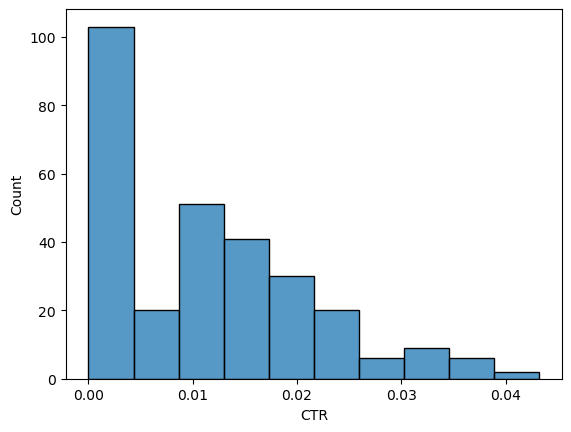

In [61]:
# click through Rate
sns.histplot(data = new_df, x = 'CTR')
plt.show()

In [62]:
# we can see the click through rate is below 40%, and we can see that there is 0 ctc.

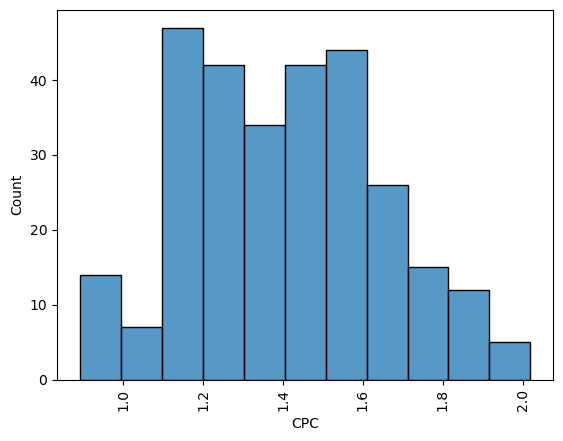

In [63]:
# Cost pre click
sns.histplot(data = new_df, x = 'CPC')
plt.xticks(rotation= 90)
plt.show()

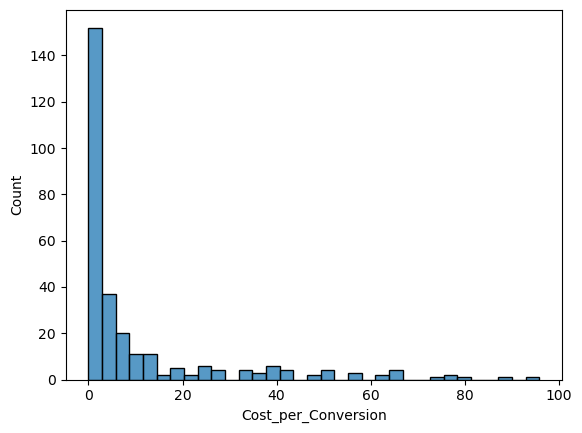

In [64]:
sns.histplot(data = new_df, x = 'Cost_per_Conversion')
plt.show()

In [65]:
# WE can the cost_per_conversion is low, almost most of the cost lies below $20

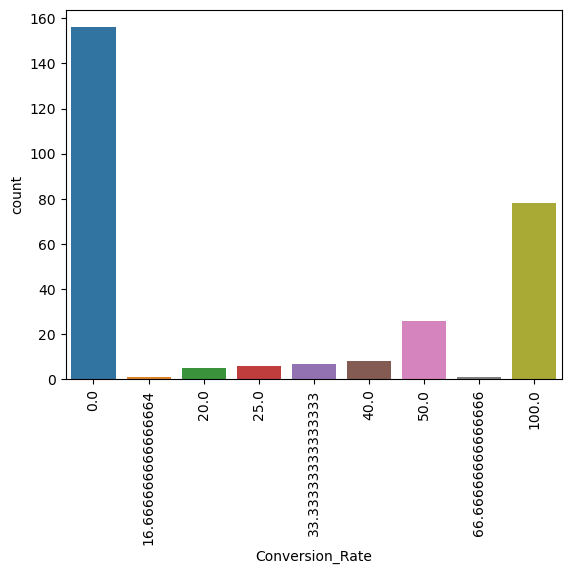

In [66]:
sns.countplot(data = new_df, x = 'Conversion_Rate')
plt.xticks(rotation= 90)
plt.show()

<Axes: xlabel='Approved_Conversion', ylabel='CTR'>

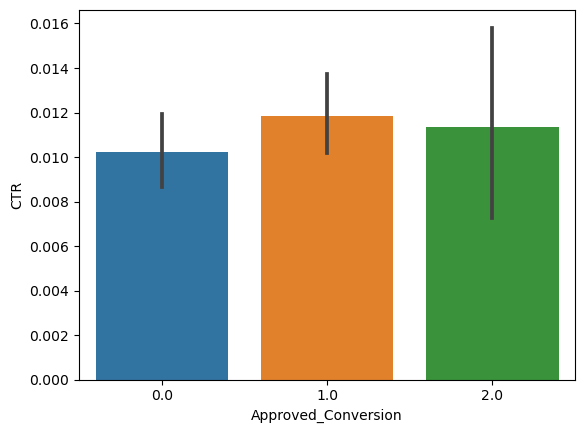

In [67]:
sns.barplot(data = new_df, y = 'CTR', x = 'Approved_Conversion')

In [68]:
# We can see that the approved_conversion are high in the high CTR

<Axes: xlabel='Approved_Conversion', ylabel='CPC'>

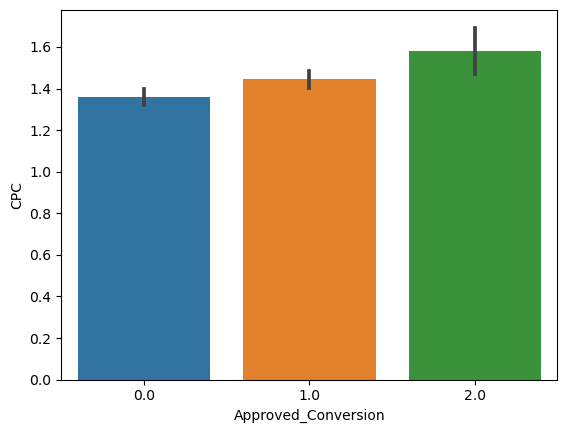

In [69]:
sns.barplot(data = new_df, y = 'CPC', x = 'Approved_Conversion')

In [70]:
# We can clearly see that  the approved_conversion is high when the CPC is high.

<Axes: xlabel='Approved_Conversion', ylabel='Cost_per_Conversion'>

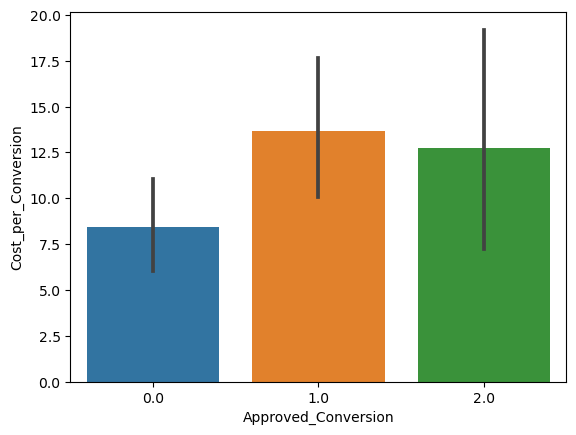

In [71]:
sns.barplot(data = new_df, y = 'Cost_per_Conversion', x = 'Approved_Conversion')

In [72]:
# If the Cost_per_conversion increases the approved_conversion also increases.

<Axes: xlabel='Approved_Conversion', ylabel='Conversion_Rate'>

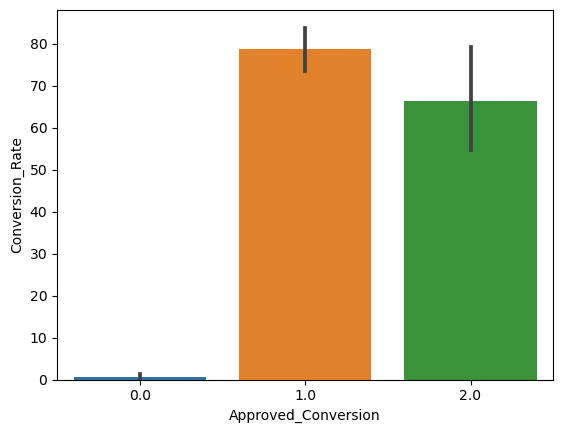

In [73]:
sns.barplot(data = new_df, y = 'Conversion_Rate', x = 'Approved_Conversion')

In [74]:
# If the conversion-rate is low, there is no approve if the conversion rate is high we can see that there is chance of high approved_conversion of 1.0

In [75]:
# removing the ad_id, which is not useful in this usecase.
new_df.drop('ad_id', axis =1, inplace = True)

In [76]:
# Now our dataset is ready for model building.

### Task-2

**Model Development**

Split the data into training and testing sets.<br>
Build a predictive model using an appropriate algorithm (such as linear regression, logistic regression, or decision trees) to predict the probability of a user converting after seeing an ad.<br>
Evaluate the performance of your model using appropriate metrics (such as accuracy, precision, recall, F1 score, and AUC-ROC).

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [112]:
new_df['Approved_Conversion'].value_counts()

0.0    159
1.0    109
2.0     20
Name: Approved_Conversion, dtype: int64

In [113]:
X = new_df.drop(['Approved_Conversion'],axis = 1)
y = new_df['Approved_Conversion']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [115]:
X_train.head()

gender  interest  Impressions  Clicks  Spent  Total_Conversion  \
294     1.0      31.0       3279.0     0.0   0.00               1.0   
181     0.0      30.0        493.0     0.0   0.00               1.0   
178     0.0      26.0      10126.0     3.0   4.62               1.0   
235     0.0       2.0        506.0     0.0   0.00               1.0   
54      1.0      10.0       1772.0     0.0   0.00               1.0   

     age_30-34  age_35-39  age_40-44  age_45-49       CTR    CPC  \
294        1.0        0.0        0.0        0.0  0.000000  1.208   
181        1.0        0.0        0.0        0.0  0.000000  1.111   
178        1.0        0.0        0.0        0.0  0.029627  1.540   
235        1.0        0.0        0.0        0.0  0.000000  1.194   
54         1.0        0.0        0.0        0.0  0.000000  1.214   

     Cost_per_Conversion  Conversion_Rate  
294                1.038              0.0  
181                0.000              0.0  
178                4.040              0.0  
235                0.000              0.0  
54                 0.000            100.0

### Linear Regression

In [116]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [117]:
print("R2 score:", r2_score(y_test, y_pred_lr))
print('-------*--------')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print('-------*--------')
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_lr, squared=False))

R2 score: 0.825944392537725
-------*--------
Mean Absolute Error: 0.1363531382808702
-------*--------
Root Mean Squared Error: 0.24424780512902408


findings -  

+ The R2 score is 0.8259, which means that around 82.59% of the variance in the target variable can be explained by the independent variables used in the model. the better the R2 score the better the model is.

+ The Mean Absolute Error (MAE) is 0.13, which means that, on average, the model's predictions are off by 0.13 units from the actual values.

+ The Root Mean Squared Error (RMSE) is 0.24, which is the square root of the average of the squared differences between the predicted and actual values.

Based on these evaluation metrics, we can infer that the linear regression model has a good fit to the data and predicts the target variable with good accuracy. 
The low MAE and RMSE suggest that the model's predictions are close to the actual values, and the high R2 score indicates that most of the variance in the target variable is explained by the model.

### Decision Tree Regressor


In [118]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [119]:
print("R2 score:", r2_score(y_test, y_pred_dt))
print('-------*--------')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print('-------*--------')
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_dt, squared=False))

R2 score: 0.9279224875101245
-------*--------
Mean Absolute Error: 0.041536050156739814
-------*--------
Root Mean Squared Error: 0.15717611688306307


findings - 

+ The R2 score is 0.9279, which means that around 92.79% of the variance in the target variable can be explained by the independent variables used in the model. the better the R2 score the better the model is.

+ The Mean Absolute Error (MAE) is 0.0415, which means that, on average, the model's predictions are off by 0.0415 units from the actual values. This value is relatively small, indicating that the model has good accuracy in predicting the target variable.

+ The Root Mean Squared Error (RMSE) is 0.1572, which is the square root of the average of the squared differences between the predicted and actual values. 

Overall, these evaluation metrics suggest that the decision tree model is a good fit than the regression model, having high R2 score and low rmse.

### logistic Regression

In [120]:
lr = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

In [121]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
f1 = f1_score(y_test, y_pred, average='weighted')
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)
classification = classification_report(y_test, y_pred)

In [122]:
# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(' ')

Accuracy: 0.9827586206896551
Precision: 0.9837164750957854
Recall: 0.9827586206896551
F1 Score: 0.9812807881773399
ROC AUC Score: 0.9725171369360753
 


+ The logistic Regression model has the high Accuracy of 98%, means that it correctly classfies almost all the test samples.
+ the precision and the recall scores are also high, this states that the model is performing well in both postive and well as negative classes.
+ the F1 score which is the harmonic mean of the precision and recall was 0.98, this indicates that the model is good fit between the precision and recall.
+ the Roc Auc score is also high, which means our model is peforming well.

In [123]:
print(f"Cassification Report:\n{classification}")

Cassification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.67      0.80         3

    accuracy                           0.98        58
   macro avg       0.98      0.89      0.92        58
weighted avg       0.98      0.98      0.98        58



+ the classification report shows that all the metrics at one place, here we can see the precision, recall and f1-score.
+ The model performed perfectly for class 0 (precision=1.0, recall=1.0, and F1 score=1.0), means that it was able to identify all the test samples.
+ For class 1, the precision score was 0.94 and the recall score was 1.0, means that it was able to classify almost all the test samples, expect very few.
+ For class 2, the precision score was 1.0, but the recall score was only 0.67, means that the model has high number of false negatives for this class 2.

if we look at the weighted Average of the Precision it is 0.98 , recall is 0.98 and the F1-score is 0.98, which is good, and indicates the overall performance of the model.

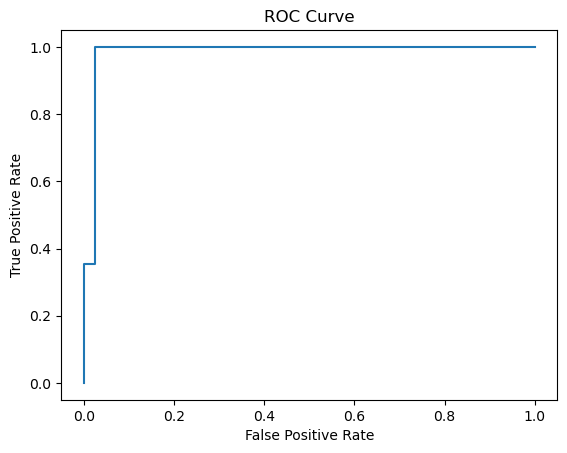

In [124]:
#roc curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### DecisionTreeClassifier

In [125]:
dt = DecisionTreeClassifier(random_state=1)
ovr_dt = OneVsRestClassifier(dt)
ovr_dt.fit(X_train, y_train)
y_prob = ovr_dt.predict_proba(X_test)
y_pred = ovr_dt.predict(X_test)

In [126]:
# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
classification = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)

In [127]:
# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(' ')
print(f"Classification Report:\n{classification}")

Accuracy: 0.9827586206896551
Precision: 0.9837164750957854
Recall: 0.9827586206896551
F1 Score: 0.9812807881773399
ROC AUC Score: 0.940379403794038
 
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.67      0.80         3

    accuracy                           0.98        58
   macro avg       0.98      0.89      0.92        58
weighted avg       0.98      0.98      0.98        58



+ the Decision Tree classifier is performing very similar to the logistic regression, with overall accuracy of the 0.98, the precision, recall and the f1-score are very similar to the logistic regression, means that the model is corectly classifing almost all the test samples.
+ The Roc Auc sccore is little higher in the logistic regression than the decision tree, this shows that the logistics regression works better than the decision tree in some situations where the false postive rate is important.
+ Finally, I can say that the Decision tree classifier is performing well on the test data, having high accuracy and precision and recall.
Overall, the Logistic Regression peforms well when we compare with the remaining models.

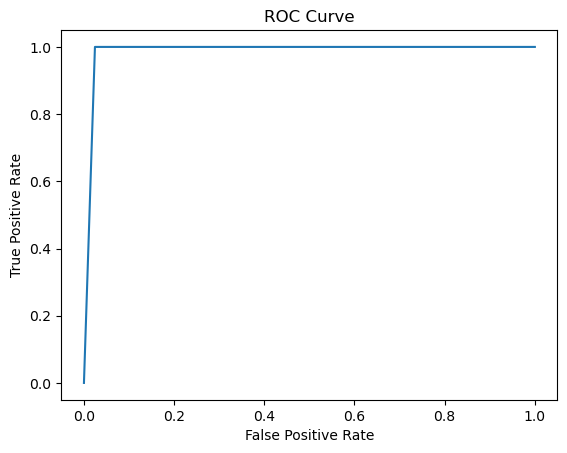

In [128]:
# plot roc curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### scaling the features.

Scaling the features using min-max scalar, which brings the values into 0 - 1 which makes better to interpret to the model.

In [129]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [130]:
scal_features = new_df[['interest','Impressions','Clicks','Spent','Total_Conversion','CPC','Cost_per_Conversion','Conversion_Rate']]

In [131]:
new_df['interest'] = mms.fit_transform(new_df[['interest']])

In [132]:
new_df['Impressions'] = mms.fit_transform(new_df[['Impressions']])

In [133]:
new_df['Clicks'] = mms.fit_transform(new_df[['Clicks']])

In [134]:
new_df['Spent'] = mms.fit_transform(new_df[['Spent']])

In [135]:
new_df['Total_Conversion'] = mms.fit_transform(new_df[['Total_Conversion']])

In [136]:
new_df['CPC'] = mms.fit_transform(new_df[['CPC']])

In [137]:
new_df['Cost_per_Conversion'] = mms.fit_transform(new_df[['Cost_per_Conversion']])

In [138]:
new_df['Conversion_Rate'] = mms.fit_transform(new_df[['Conversion_Rate']])

In [139]:
new_df.head()

gender  interest  Impressions    Clicks     Spent  Total_Conversion  \
0     1.0  0.382353     0.015563  0.015873  0.013863          0.333333   
1     1.0  0.411765     0.038438  0.031746  0.017644          0.333333   
2     1.0  0.529412     0.001075  0.000000  0.000000          0.166667   
3     1.0  0.764706     0.008836  0.015873  0.012118          0.166667   
4     1.0  0.764706     0.008562  0.015873  0.012506          0.166667   

   Approved_Conversion  age_30-34  age_35-39  age_40-44  age_45-49       CTR  \
0                  1.0        1.0        0.0        0.0        0.0  0.013605   
1                  0.0        1.0        0.0        0.0        0.0  0.011198   
2                  0.0        1.0        0.0        0.0        0.0  0.000000   
3                  0.0        1.0        0.0        0.0        0.0  0.023480   
4                  1.0        1.0        0.0        0.0        0.0  0.024195   

        CPC  Cost_per_Conversion  Conversion_Rate  
0  0.477876             0.014919              0.5  
1  0.017699             0.074846              0.0  
2  0.325664             0.000000              0.0  
3  0.318584             0.006051              0.0  
4  0.353982             0.013459              1.0

### Linear Regression

In [140]:
X = new_df.drop(['Approved_Conversion'],axis = 1)
y = new_df['Approved_Conversion']

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [142]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [143]:
print("R2 score:", r2_score(y_test, y_pred_lr))
print('-------*--------')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print('-------*--------')
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_lr, squared=False))

R2 score: 0.825944392537723
-------*--------
Mean Absolute Error: 0.136353138280871
-------*--------
Root Mean Squared Error: 0.2442478051290255


### Decision tree regressor

In [144]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [145]:
print("R2 score:", r2_score(y_test, y_pred_dt))
print('-------*--------')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print('-------*--------')
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_dt, squared=False))

R2 score: 0.9279224875101245
-------*--------
Mean Absolute Error: 0.041536050156739814
-------*--------
Root Mean Squared Error: 0.15717611688306307


### Logistic Regression

In [146]:
lr = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

In [147]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)
classification = classification_report(y_test, y_pred)

In [148]:
# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(' ')
print(f"Cassification Report:\n{classification}")

Accuracy: 0.9655172413793104
Precision: 0.969147005444646
Recall: 0.9655172413793104
F1 Score: 0.9578544061302682
ROC AUC Score: 0.940379403794038
 
Cassification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       0.89      1.00      0.94        17
         2.0       1.00      0.33      0.50         3

    accuracy                           0.97        58
   macro avg       0.96      0.78      0.81        58
weighted avg       0.97      0.97      0.96        58



### DecisionTreeClassifier

In [152]:
dt = DecisionTreeClassifier(random_state=1)
ovr_dt = OneVsRestClassifier(dt)
ovr_dt.fit(X_train, y_train)
y_prob = ovr_dt.predict_proba(X_test)
y_pred = ovr_dt.predict(X_test)

In [153]:
# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
classification = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)

In [154]:
# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(' ')
print(f"Classification Report:\n{classification}")

Accuracy: 0.9827586206896551
Precision: 0.9837164750957854
Recall: 0.9827586206896551
F1 Score: 0.9812807881773399
ROC AUC Score: 0.940379403794038
 
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.67      0.80         3

    accuracy                           0.98        58
   macro avg       0.98      0.89      0.92        58
weighted avg       0.98      0.98      0.98        58



After scaling the features, we can't see that much improvement, the decision tree classifier is performing better when compared to all the remaining models.

### Task 3

Feature Importance and Interpretation

Analyze the feature importance to understand which factors have the greatest impact on conversion rates.
Interpret the results of the model and discuss any insights you can draw from the feature importance analysis.


+ The goal of feature importance analysis is to identify the features that have the strongest influence on the model's predictions.
+ Model interpretation refers to the process of understanding how a machine learning model makes predictions

There are several methods to find the feature importance, they are,
+ Permutation importance.
+ Tree-based methods.
+ Local interpretation such as Lime and shap

### Permutation Importance

In [172]:
# Using Logistic Regression

from sklearn.inspection import permutation_importance
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
result = permutation_importance(logreg_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances in descending order
indices = np.argsort(result.importances_mean)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_test.columns[i] for i in indices]

# Create a dataframe of feature importance scores
importances_df = pd.DataFrame({'Feature': names, 'importance_lg': result.importances_mean[indices]})

# Print the feature importance scores
print("Feature importance scores using Permutation Importance:")
print(importances_df)

Feature importance scores using Permutation Importance:
                Feature  importance_lg
0       Conversion_Rate       0.418966
1      Total_Conversion       0.046552
2   Cost_per_Conversion       0.027586
3           Impressions       0.017241
4                 Spent       0.015517
5                   CPC       0.012069
6              interest       0.010345
7                gender       0.010345
8                   CTR       0.000000
9             age_45-49       0.000000
10            age_40-44       0.000000
11            age_35-39       0.000000
12            age_30-34       0.000000
13               Clicks       0.000000


In [164]:
# Using Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances in descending order
indices = np.argsort(result.importances_mean)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_test.columns[i] for i in indices]

# Create a dictionary with feature names and their corresponding importance scores
feature_importance = {'Feature': [X_test.columns[i] for i in indices],
                      'Importance_lr': result.importances_mean[indices]}

# Convert the dictionary to a pandas DataFrame
df_feature_importance1 = pd.DataFrame.from_dict(feature_importance)

# Print the DataFrame
print(df_feature_importance1)

                Feature  Importance_lr
0       Conversion_Rate       1.317414
1                 Spent       0.483316
2      Total_Conversion       0.385823
3   Cost_per_Conversion       0.250722
4           Impressions       0.165244
5                Clicks       0.016859
6              interest       0.000547
7             age_45-49       0.000000
8             age_40-44       0.000000
9             age_35-39       0.000000
10            age_30-34       0.000000
11               gender      -0.000027
12                  CTR      -0.001591
13                  CPC      -0.008066


In [181]:
# using DecisionTree Classifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances in descending order
indices = np.argsort(result.importances_mean)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_test.columns[i] for i in indices]

# Create a dictionary with feature names and their corresponding importance scores
feature_importance = {'Feature': [X_test.columns[i] for i in indices],
                      'Importance_dt': result.importances_mean[indices]}

# Convert the dictionary to a pandas DataFrame
df_feature_importance = pd.DataFrame.from_dict(feature_importance)

# Print the DataFrame
print(df_feature_importance)

                Feature  Importance_dt
0       Conversion_Rate       0.437931
1      Total_Conversion       0.089655
2                Clicks       0.001724
3   Cost_per_Conversion       0.000000
4                   CPC       0.000000
5                   CTR       0.000000
6             age_45-49       0.000000
7             age_40-44       0.000000
8             age_35-39       0.000000
9             age_30-34       0.000000
10                Spent       0.000000
11          Impressions       0.000000
12             interest       0.000000
13               gender       0.000000


In [169]:
importance_df = df_feature_importance.merge(df_feature_importance1, on = 'Feature')

In [173]:
importance_df = importance_df.merge(importances_df, on='Feature')

In [174]:
importance_df

Feature  Importance_dt  Importance_lr  importance_lg
0       Conversion_Rate       0.437931       1.317414       0.418966
1      Total_Conversion       0.089655       0.385823       0.046552
2                 Spent       0.001724       0.483316       0.015517
3   Cost_per_Conversion       0.000000       0.250722       0.027586
4                   CPC       0.000000      -0.008066       0.012069
5                   CTR       0.000000      -0.001591       0.000000
6             age_45-49       0.000000       0.000000       0.000000
7             age_40-44       0.000000       0.000000       0.000000
8             age_35-39       0.000000       0.000000       0.000000
9             age_30-34       0.000000       0.000000       0.000000
10               Clicks       0.000000       0.016859       0.000000
11          Impressions       0.000000       0.165244       0.017241
12             interest       0.000000       0.000547       0.010345
13               gender       0.000000      -0.000027       0.010345

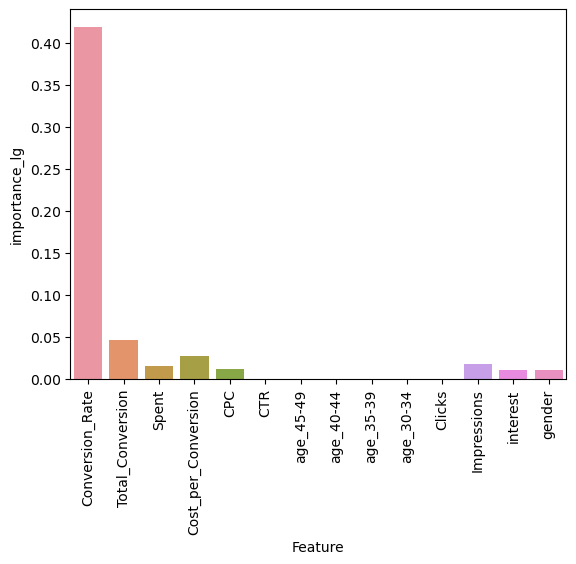

In [182]:
# taking Logistic Regression, beacuse it performs well on the test data.
sns.barplot(data = importance_df, x = 'Feature', y = 'importance_lg')
plt.xticks(rotation = 90)
plt.show()

**These are the top 5 features**
+ Conversion_Rate
+ Total_conversion
+ Cost_per_conversion
+ Spent
+ impresssions

### using tree-based methods.

In [183]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a random forest classifier on the data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Compute feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create a DataFrame to display the feature importances
fi_df = pd.DataFrame({'feature': names, 'importance': importances[indices]})

# Print the feature importance scores
print("Feature importance scores using Random Forest:")
print(fi_df)

Feature importance scores using Random Forest:
                feature  importance
0       Conversion_Rate    0.546573
1      Total_Conversion    0.086539
2           Impressions    0.072105
3   Cost_per_Conversion    0.069147
4                   CPC    0.066699
5                 Spent    0.045197
6                   CTR    0.042517
7              interest    0.036561
8                Clicks    0.027922
9                gender    0.006740
10            age_45-49    0.000000
11            age_40-44    0.000000
12            age_35-39    0.000000
13            age_30-34    0.000000


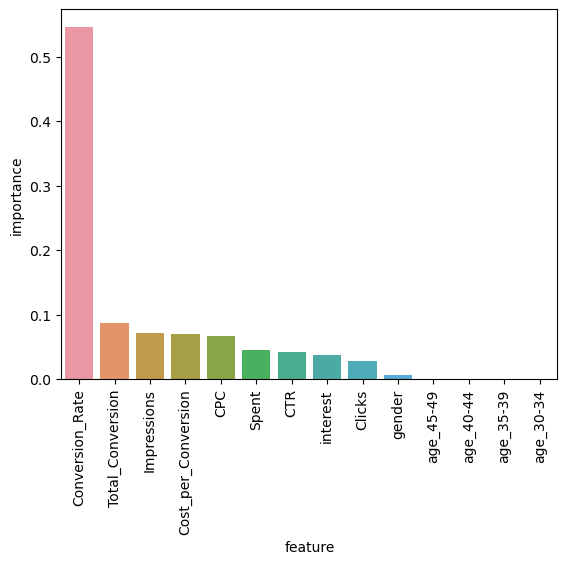

In [185]:
sns.barplot(data = fi_df, x = 'feature', y = 'importance')
plt.xticks(rotation = 90)
plt.show()

**These are the top 5 features**
+ Conversion_Rate
+ Total_conversion
+ impresssions
+ Cost_per_conversion
+ CPC


### Local importance like LIME

Using 230 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/58 [00:00<?, ?it/s]

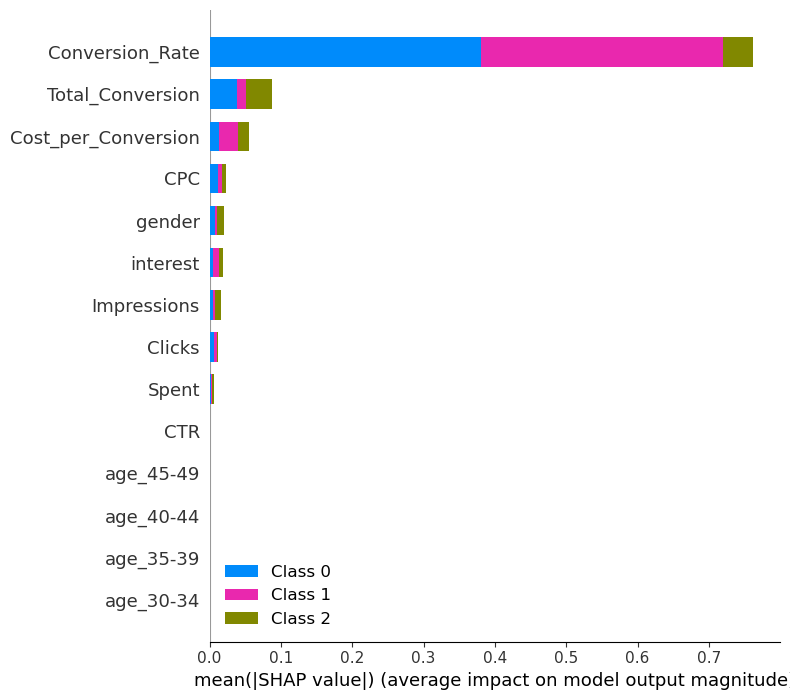

In [206]:
import shap

# Using logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Create a kernel explainer object
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

shap.summary_plot(shap_values, X_test)

**These are the top 5 features**
+ Conversion_Rate
+ Total_conversion
+ Cost_per_conversion
+ CPC
+ Gender & CPC


### Feature importance

**Note** - Here I only used the logistic regression model for the feature selection, because it gives the better performance, we can use all the models.<br>

By analysing all three methods we can say these are the features that mostly contribute towards the output variable.

**Important Features**
+ Conversion_Rate
+ total_conversion
+ Cost_per_conversion
+ impressions

**Least important Features**
+ age
+ Id ( removed )


So, we should keep focus on these features.

### Task 4

Recommendations

Based on your findings, provide recommendations for improving the conversion rate of the advertising campaign. Consider aspects such as user targeting, ad design, budget allocation, and ad placement strategies.


**My Recommendations**

Based on my Analysis, Here are some of the recommendations that I can give.

Focus on the most important features, and find the ways the to modify and increase the rate, as well as we should kept focus on the non-important features also, and why they are not performing well and come up with the solutions to solve them.

    Our End Goal is to Increase the CONVERSION RATE.

1. **Targeting Aspects.**
   + when I  fit the models(lg,lr,dt), I found that, the age (groups), gender, and clicks have the significance affect on the conversion rate, so It would be better to focus on the different age groups, and come up with the good stratagey to boost the conversion rate.

2. **Ad Design Aspects.**

   + when we fit tree model for the feature importance, we can see that CPC and CTR having some importance in the conversion rate. so we should comeup with new technologies to attract and may be coming up with new designs, etc may works well.

3. **Budget allocation Aspects.**

   + From the Lr and Lg models, the amount Spent is the important features for the conversion rate, so we have to be encourage the amount spending inorder to increase the conversion rate, and also the budget should be reasonble so that we didn't end up in looses.
   
4. **Ad placement strategies Aspects.**

   + We have seen in the feature importance, the impressions are also one of the important feature for the conversion rate, so it always recommended to have a more attracting ads so that it wil increase the impressions, and then CTR and then conversion rate.and the ad should be placed in the more popular sites, so that It can attract auidence, which indirectly increase the conversion rate.
   
These are the some of the recommendations, I can give from my analysis, it doesn't mean that there are no pitfalls in the company, it always better to cross check everytime, and make a proper analysis for the increase and the decrease in the conversion rate.